<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/telecom1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
trainingData = pd.read_csv("drive/MyDrive/telecom.csv")


In [92]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [93]:
trainingData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Label Encoding

In [94]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = label_encoder.fit_transform(trainingData['phone number'])


# Rename Columns

In [95]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)


# Find Correlation 

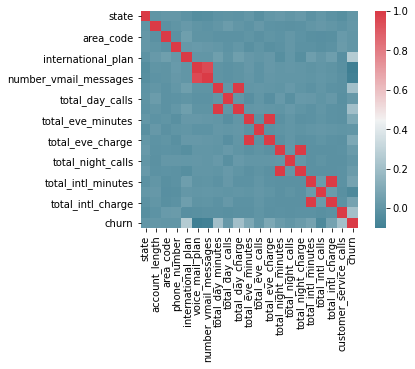

In [96]:
import seaborn as sns
corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [97]:
corr['churn']

state                     0.007780
account_length            0.016541
area_code                 0.006174
phone_number              0.005626
international_plan        0.259852
voice_mail_plan          -0.102148
number_vmail_messages    -0.089728
total_day_minutes         0.205151
total_day_calls           0.018459
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_calls           0.009233
total_eve_charge          0.092786
total_night_minutes       0.035493
total_night_calls         0.006141
total_night_charge        0.035496
total_intl_minutes        0.068239
total_intl_calls         -0.052844
total_intl_charge         0.068259
customer_service_calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

# Find Features Selection

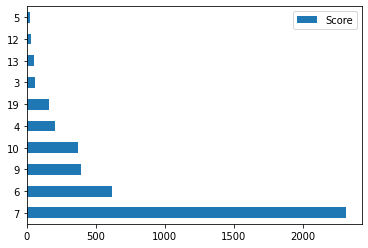

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
a=trainingData.drop(columns='churn')
b=trainingData['churn']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(a,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').plot(kind='barh')  #print 10 best features
plt.show()

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(a,b)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()
n=feat_importances.nlargest(20)
print(n)

total_day_charge          0.118294
total_day_minutes         0.117647
customer_service_calls    0.116661
international_plan        0.071965
total_eve_minutes         0.055460
total_eve_charge          0.052348
total_intl_calls          0.048772
total_intl_minutes        0.043168
total_intl_charge         0.043117
total_night_minutes       0.037961
total_night_charge        0.035635
total_day_calls           0.034555
phone_number              0.033284
total_night_calls         0.033274
total_eve_calls           0.033093
state                     0.032575
account_length            0.032553
area_code                 0.021734
voice_mail_plan           0.019440
number_vmail_messages     0.018464
dtype: float64


# DF with Selected feature 

In [100]:
'''DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()'''

"DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})\nprint(DataFeatureSelection.shape)\nDataFeatureSelection.head()"

In [101]:
DataFeatureSelection=trainingData.drop(columns={'total_night_charge','total_day_calls','account_length','total_night_calls','phone_number','state','total_eve_calls','area_code','voice_mail_plan','number_vmail_messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()

(3333, 11)


,international_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,265.1,45.07,197.4,16.78,244.7,10.0,3,2.70,1,0
1,0,161.6,27.47,195.5,16.62,254.4,13.7,3,3.70,1,0
2,0,243.4,41.38,121.2,10.30,162.6,12.2,5,3.29,0,0
3,1,299.4,50.90,61.9,5.26,196.9,6.6,7,1.78,2,0
4,1,166.7,28.34,148.3,12.61,186.9,10.1,3,2.73,3,0


# Find the percent of churn customer to non-churn customer

483
Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


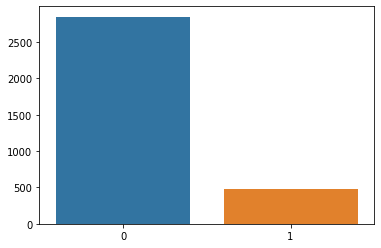

In [102]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print(y_True.shape[0])
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [103]:
trainingData.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [104]:
col=trainingData.columns
print(col)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


In [105]:
churn=trainingData[trainingData['churn']==True]
non_churn=trainingData[trainingData['churn']==False]

international_plan
0.2836438923395445
0.06526315789473684


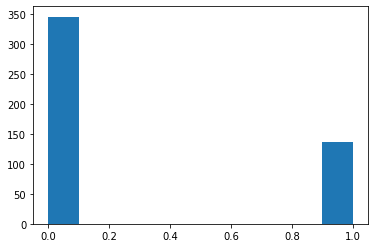

In [110]:
from matplotlib.pyplot import hist
print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])
international_plan_Ch=(churn['international_plan']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['international_plan']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

area_code
437.8178053830228
437.07473684210527


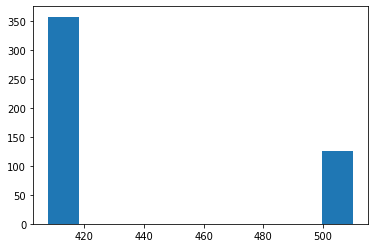

In [112]:
from matplotlib.pyplot import hist
print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])
international_plan_Ch=(churn['area_code']).sum()/churn.shape[0]
international_plan_NonCh=(non_churn['area_code']).sum()/non_churn.shape[0]
print(international_plan_Ch)
print(international_plan_NonCh)

**NOTE:** here from above avg for churn and non-churn data we can say "area_code" not important

In [ ]:
from matplotlib.pyplot import hist
print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])

In [ ]:
from matplotlib.pyplot import hist
print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])

In [ ]:
from matplotlib.pyplot import hist
print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])

## Churn percentage


In [ ]:
import plotly.express as px
fig = px.pie(trainingData, names='churn', title='churn',width=400, height=400)
fig.show()

##Deep Neural Network

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf

In [ ]:
y=trainingData['churn']
x = trainingData
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
train = x_train.pop('churn')
test = x_test.pop('churn')
print(len(x))
print(len(x_train))
print(len(x_test))

*****Duha

In [ ]:
DataFeatureSelection=trainingData.drop(columns={'total night charge','total day calls','account length','total night calls','phone number','state','total eve calls','area code','voice mail plan','number vmail messages'})
print(DataFeatureSelection.shape)
DataFeatureSelection.head()

In [ ]:
DataFeatureSelection.head()

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
y=DataFeatureSelection['churn']
x = DataFeatureSelection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
train = x_train.pop('churn')
test = x_test.pop('churn')
print(len(x))
print(len(x_train))
print(len(x_test))

*******Duha

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [ ]:
my_feature_columns = []
for key in x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    #hidden_units=[256,128,64,32],
    # The model must choose between 3 classes.
    n_classes=2)

In [ ]:
classifier.train(
    input_fn=lambda: input_fn(x_train, train, training=True),steps=5000)

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))
deepNeuralNetwork=(eval_result['accuracy']);

# plot_confusion_matrix(lr, x_test, y_test)
# plt.show()


## Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x = trainingData[['state', 'account_length', 'area_code', 'phone_number','international_plan', 'voice_mail_plan', 'number_vmail_messages','total_day_minutes', 'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls', 'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes', 'total_intl_calls', 'total_intl_charge','customer_service_calls']]
y = trainingData['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
linearRegression=s1;
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
x = DataFeatureSelection.drop(columns='churn')
y = DataFeatureSelection['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
linearRegression=s1;
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

## Gradient Booster Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
gradientBossterClassifier=s2
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p2=gbc.predict(x_test)
s2=accuracy_score(y_test,p2)
gradientBossterClassifier=s2
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
randomForestClassifier=s3;
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
randomForestClassifier=s3;
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
supportVectorMachine=s4;
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
supportVectorMachine=s4;
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
kNearestNeighbours=max(scorelist)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
kNearestNeighbours=max(scorelist)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
decisionTreeClassifier=max(list1)
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
decisionTreeClassifier=max(list1)
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

## Final Results:

In [ ]:
print("Deep Neural Network : ","{:.2f}%".format(100*deepNeuralNetwork))
print("Linear Regression : ","{:.2f}%".format(linearRegression*100))
print("Gradient Booster Classifier :", "{:.2f}%".format(100*gradientBossterClassifier))
print("Random Forest Classifier : ","{:.2f}%".format(randomForestClassifier*100))
print("Support Vector Machine : ","{:.2f}%".format(supportVectorMachine*100))
print("K Nearest Neighbours : ","{:.2f}%".format(kNearestNeighbours))
print("Decision Tree Classifier : ","{:.2f}%".format(decisionTreeClassifier))

In [ ]:
print("Deep Neural Network : ","{:.2f}%".format(100*deepNeuralNetwork))
print("Linear Regression : ","{:.2f}%".format(linearRegression*100))
print("Gradient Booster Classifier :", "{:.2f}%".format(100*gradientBossterClassifier))
print("Random Forest Classifier : ","{:.2f}%".format(randomForestClassifier*100))
print("Support Vector Machine : ","{:.2f}%".format(supportVectorMachine*100))
print("K Nearest Neighbours : ","{:.2f}%".format(kNearestNeighbours))
print("Decision Tree Classifier : ","{:.2f}%".format(decisionTreeClassifier))